### Data 

In [2]:
import pandas as pd
url = 'https://github.com/arunadas/effective-pandas/raw/main/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
        .SNOW
        .rename(dates)
       )
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

### histogram

Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='Frequency'>

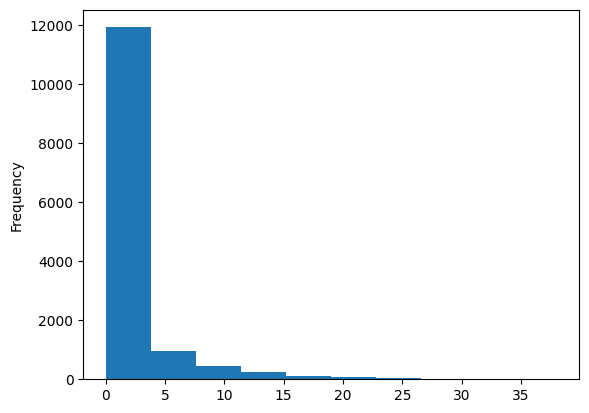

In [5]:
%matplotlib inline
snow.plot.hist()

<Axes: title={'center': 'Snowfall histogram (in)'}, ylabel='Frequency'>

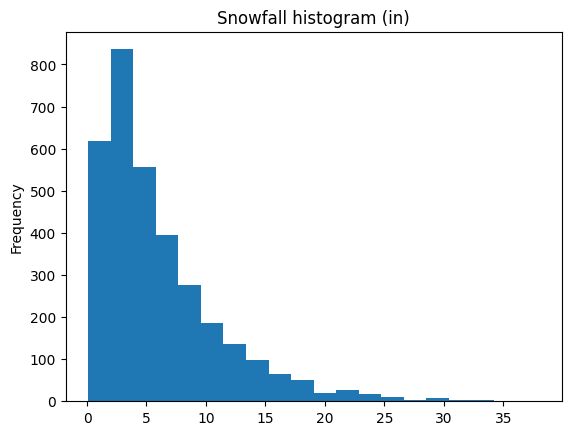

In [18]:
#skewed
snow[snow>0].plot.hist(bins=20,title='Snowfall histogram (in)')

### Boxplot

<Axes: >

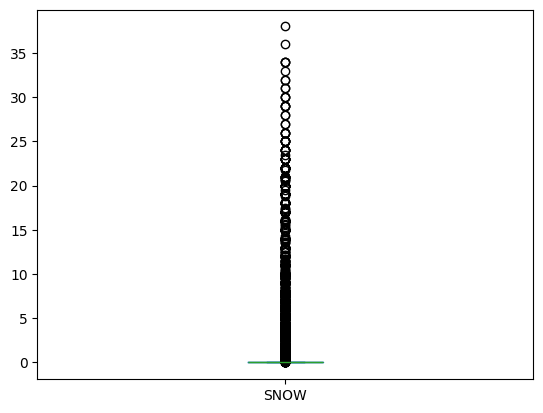

In [19]:
snow.plot.box()

<Axes: >

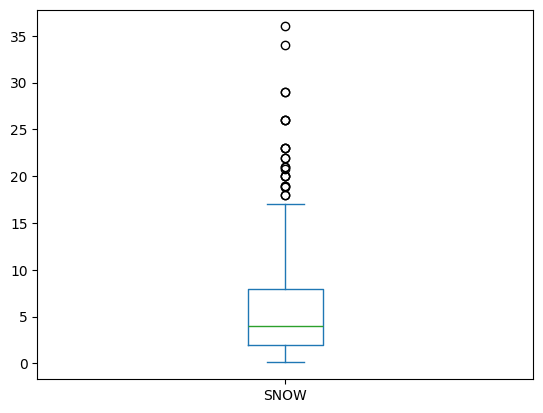

In [22]:
# january ignoring 0
(
    snow
    [lambda s:(s.index.month == 1) & (s>0)]
    .plot.box()
)

### Kernel Density Estimation Plot

<Axes: ylabel='Density'>

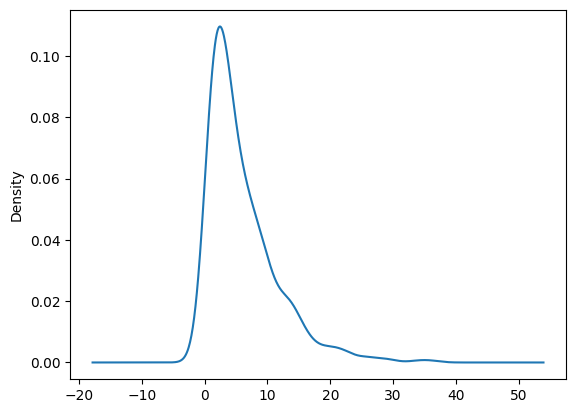

In [24]:
(
    snow
    [lambda s:(s.index.month == 1) & (s>0)]
    .plot.kde()
)

### Line plots

<Axes: >

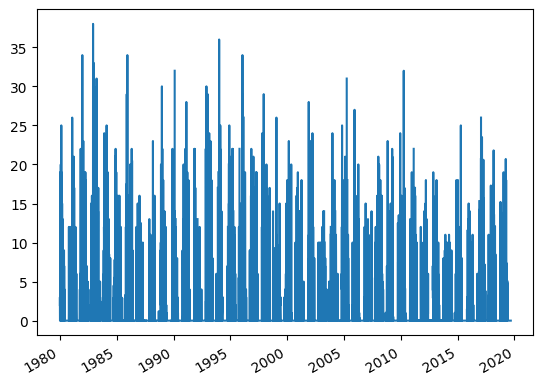

In [25]:
snow.plot.line()

<Axes: >

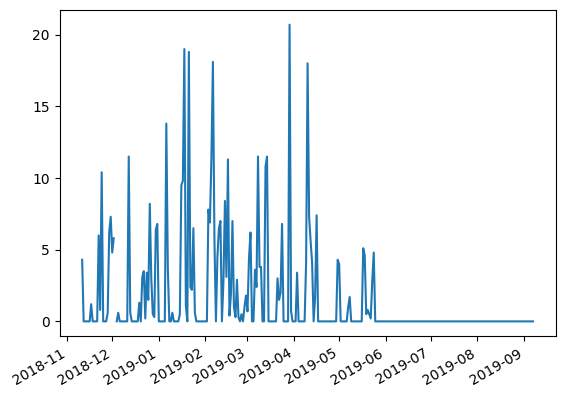

In [26]:
# plot last 300 values
(
    snow
    .iloc[-300:]
    .plot.line()
)

<Axes: >

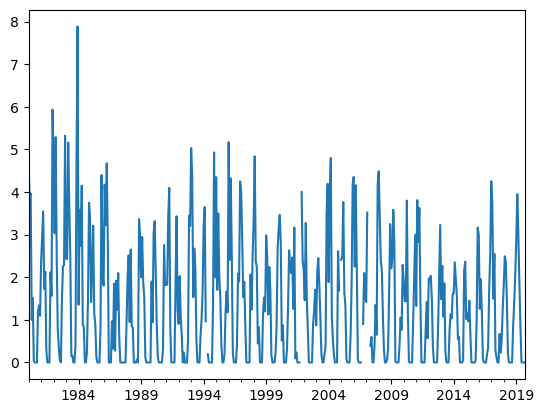

In [27]:
# aggregate monthly
(snow
.resample('ME')
 .mean()
 .plot.line()
)

### Line plots with multiple aggregations

<Axes: >

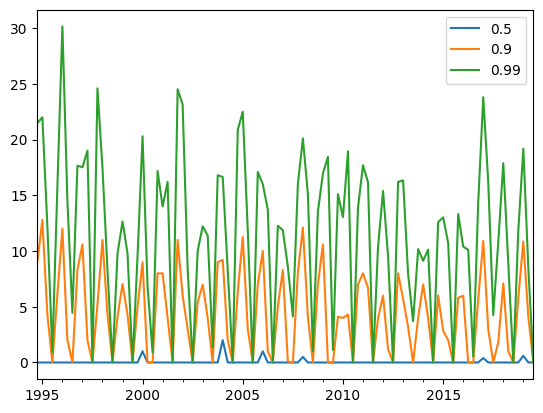

In [28]:
(snow
 .resample('QE')
 .quantile([.5, .9, .99])
 .unstack()
 .iloc[-100:]
 .plot.line()
)
           

### Bar plots

In [29]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017 
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
)

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

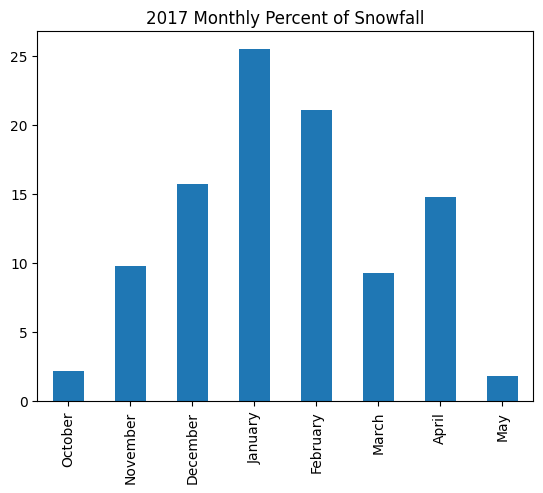

In [30]:
(season2017 
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.bar(title='2017 Monthly Percent of Snowfall')
)

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

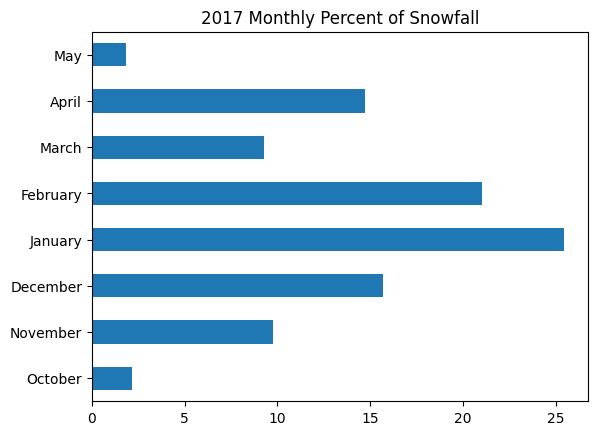

In [31]:
# horizontal bar 
(season2017 
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title='2017 Monthly Percent of Snowfall')
)

In [34]:
# bar graph with categorical data 
url = 'https://github.com/arunadas/effective-pandas/raw/main/data/vehicles.csv.zip'
df = pd.read_csv(url)
make = df.make
make.value_counts()

/var/folders/vz/kll226bs5z166d_j4rg4kj2m0000gn/T/ipykernel_32253/3243277719.py:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

<Axes: xlabel='make'>

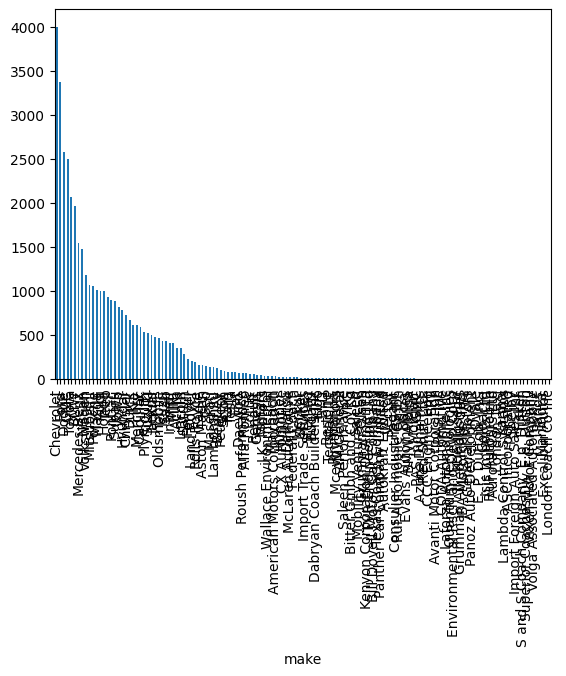

In [35]:
(make
 .value_counts()
 .plot.bar()
)

<Axes: ylabel='make'>

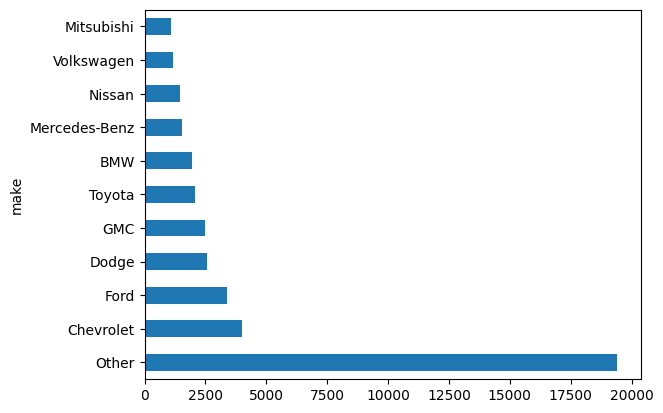

In [37]:
top10 = make.value_counts().index[:10]
(make
 .where(make.isin(top10),'Other')
 .value_counts()
 .plot.barh()
)

### Pie plots

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

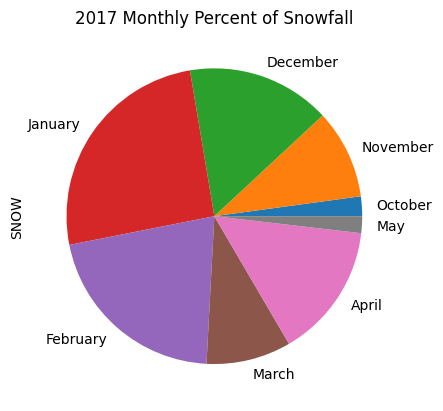

In [38]:
(season2017
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx:idx.month_name())
 .plot.pie(title='2017 Monthly Percent of Snowfall')
)

### Styling

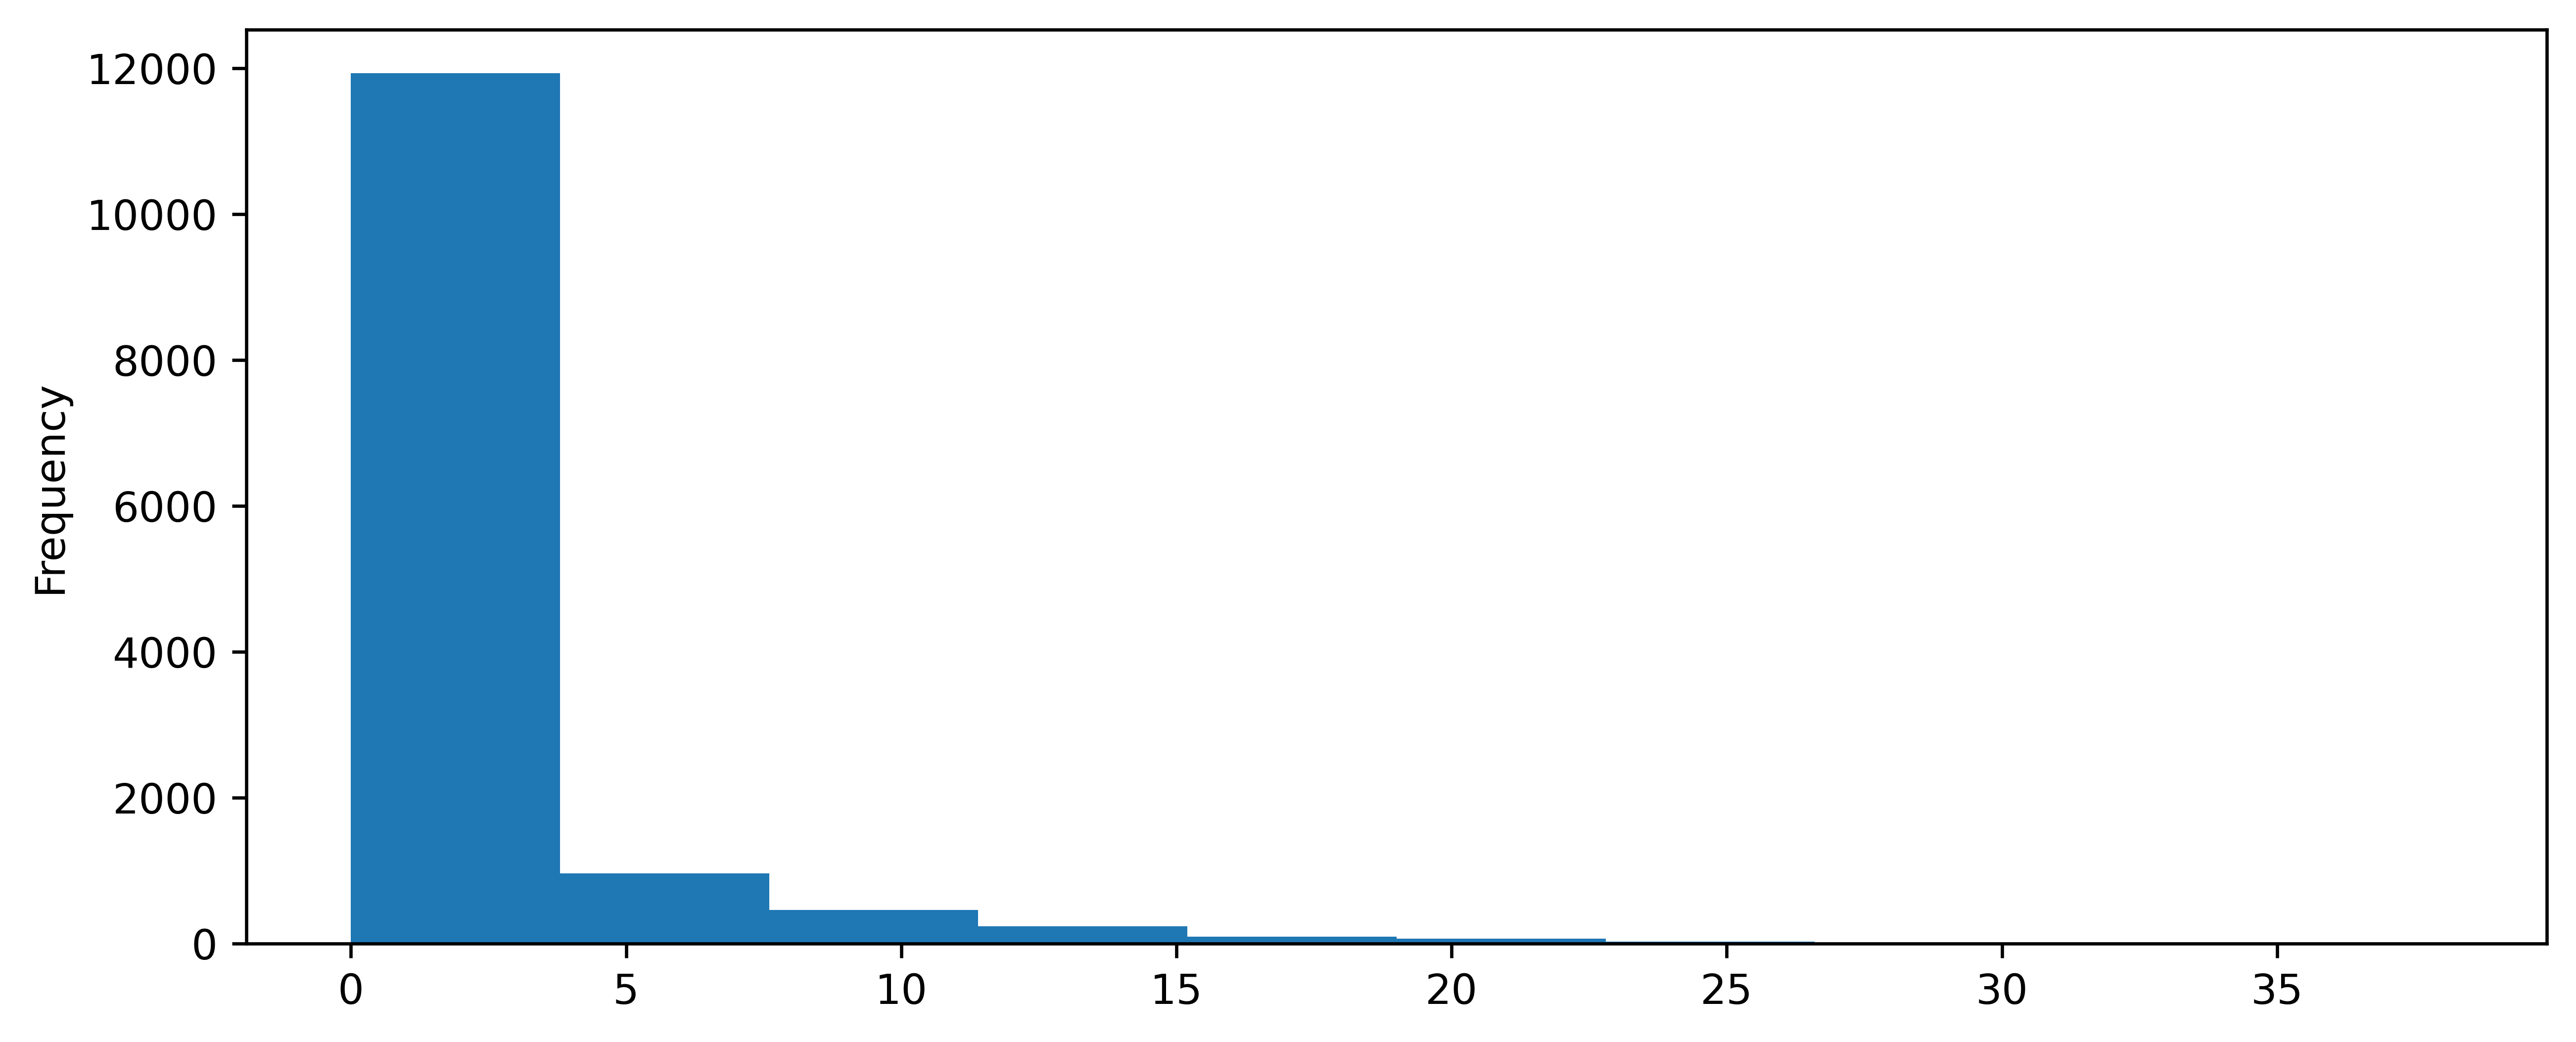

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
color_palette = ["#440154", "#482677","#404788","#33638d","#287d8e",
                 "#1f968b","#29af7f","#55c667","#73d055","#b8de29","#fde725"]
fp = matplotlib.font_manager.FontProperties(
fname = '/Fonts/roboto/Roboto-Condensed.ttf')
with sns.plotting_context(rc=dict(font='Roboto',palette=color_palette)):
    fig, ax = plt.subplots(dpi=600,figsize=(10,4))
    snow.plot.hist()
    fig.savefig('snowhist.png', dpi=600, bbox_inches='tight')


### Exercise 14.12

<Axes: ylabel='Frequency'>

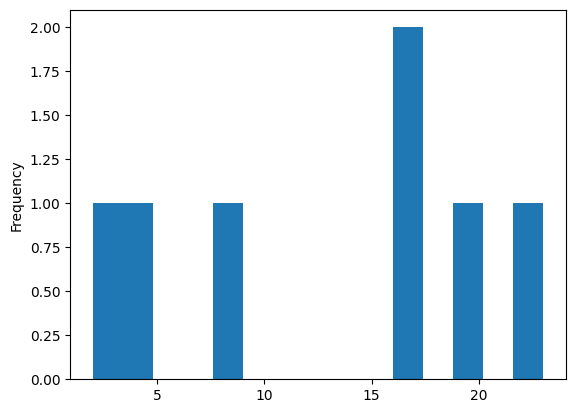

In [49]:
# Create a histogram from a numeric column. cHange the bin size
data = pd.Series([2,4.5,16,8,16,23,19])
data.plot.hist(bins=15)

<Axes: >

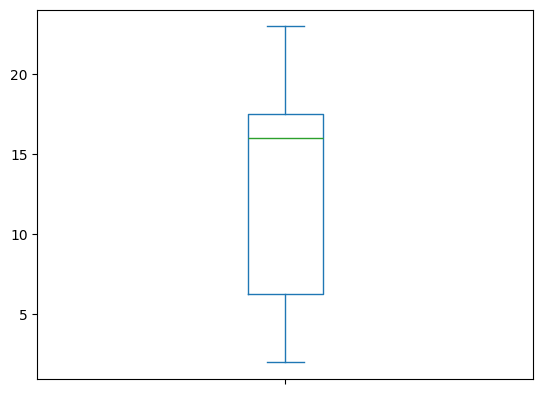

In [50]:
# create a boxplot from a numeric column
data.plot.box()

<Axes: ylabel='Density'>

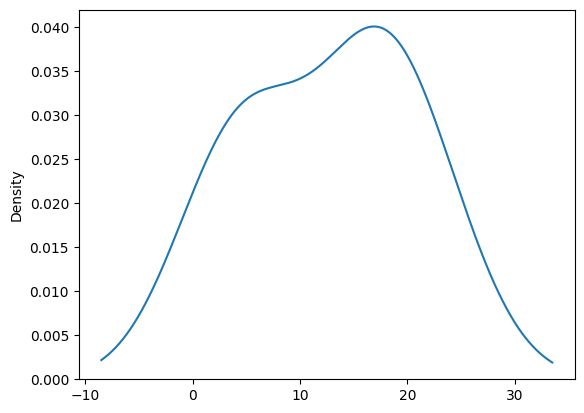

In [51]:
#create a kernel Density Estimate plot from a numeric column
data.plot.kde()

<Axes: >

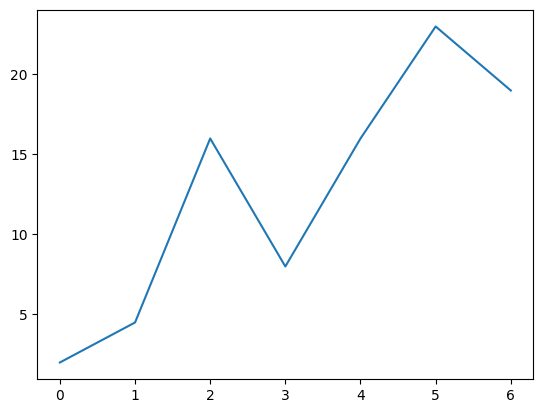

In [52]:
# create a line from a numeric column
data.plot.line()

<Axes: xlabel='make'>

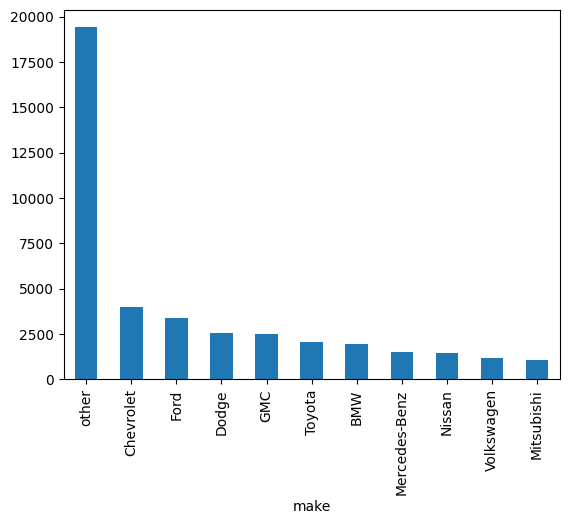

In [58]:
# create a bar plot from a frequency count of a categorical column
top10 = make.value_counts().index[:10]
(make.where(make.isin(top10),'other')
           .value_counts()
           .plot.bar())

<Axes: ylabel='make'>

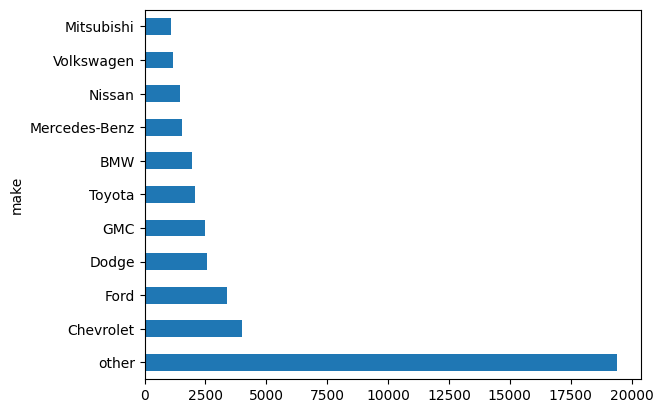

In [59]:
(make.where(make.isin(top10),'other')
           .value_counts()
           .plot.barh())

<Axes: ylabel='count'>

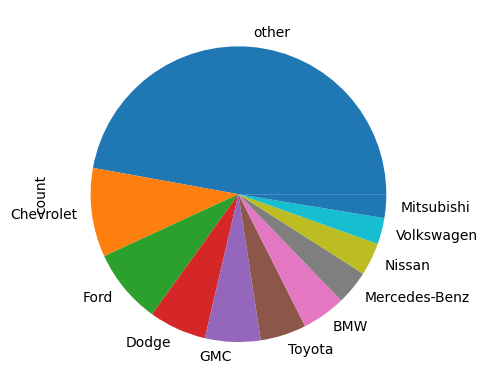

In [60]:
# create a pie chart from a frequency count of a categorical column
(make.where(make.isin(top10),'other')
           .value_counts()
           .plot.pie())